In [1]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

##### Preparing the data

In [2]:
# Read csv into dataframe
data = pd.read_csv('myopia.csv')
data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [5]:
# create labels
labels = data['MYOPIC']
labels.value_counts().nunique()

2

In [3]:
# Remove Myopic column from the dataset
data = data.drop(['MYOPIC'], axis=1)
data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [9]:
# Clean data
data.dropna(inplace=True)
data.isnull().sum()
data.duplicated().sum()

0

In [10]:
# Save cleaned data to csv
data.to_csv('myopia_cleaned.csv')

In [11]:
# Standardize the data
# Create a StandardScaler object
scaler = StandardScaler()
# Fit the scaler to the data
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         9.87137728e-01,  1.00324150e+00,  2.57480672e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
         9.87137728e-01,  1.00324150e+00, -3.88378667e-01],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -1.01302987e+00, -9.96768974e-01, -3.88378667e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
         9.87137728e-01,  1.00324150e+00, -3.88378667e-01],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.01302987e+00, -9.96768974e-01, -3.88378667e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
         9.87137728e-01,  1.00324150e+00, -3.88378667e-01]])

##### Apply Dimensionality Reduction
###### Perform dimensionality reduction with PCA. How did the number of the features change?

In [13]:
# Apply dimensionality reduction with PCA preserving 90% of the variance
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)

data_pca = pca.fit_transform(data_scaled)

# variance explained by each of the n_components
pca.explained_variance_ratio_.sum()

0.9289880687733466

##### Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

In [17]:
# t-SNE visualization of the data
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=250, n_iter=2500, perplexity=50, n_components=3,verbose=1)
data_tsne = tsne.fit_transform(data_pca)


c:\Users\vasan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.001s...
[t-SNE] Computed neighbors for 618 samples in 0.017s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.507443
[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.535210
[t-SNE] KL divergence after 2500 iterations: 2.017387


In [18]:
data_tsne.shape

(618, 3)

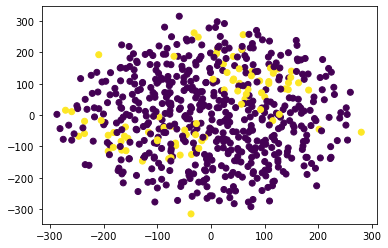

In [19]:
# Create a scatter plot of the t-SNE output. Are there distinct clusters?
plt.scatter(data_tsne[:,0], data_tsne[:,1], c=labels)
plt.show()

##### Perform a cluster analysis with KMeans

In [ ]:
# Create an elbow plot to identify the best number of clusters. Make sure to do the following:
# Use a for loop to determine the inertia for each k between 1 through 10

inertia = []
k = range(1,11)
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_) 

In [40]:
#create a dataframe with the inertia and the k values
elbow_df = pd.DataFrame({'k':k, 'inertia':inertia})
elbow_df.head()

,k,inertia
0,1,8611.719398
1,2,7453.292155
2,3,6686.361671
3,4,6206.151491
4,5,5888.248458


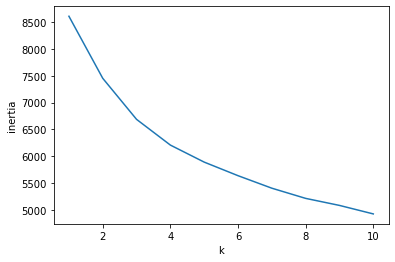

In [41]:
# Plot the elbow plot
plt.plot(elbow_df.k, elbow_df.inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [43]:
len(pca.components_)

11

In [42]:
# Create a dataframe from pca transformed data
columns = []
l= len(pca.components_)
for i in range(l):
    columns.append(i+1)
pca_df = pd.DataFrame(data_pca, columns=columns)
pca_df['class'] = kmeans.labels_
pca_df.head()


,1,2,3,4,5,6,7,8,9,10,11,class
0,0.782270,0.899383,-2.697392,0.533307,-3.138869,-1.514275,2.665827,-0.685834,1.259007,0.256176,1.837348,0
1,-0.618300,-1.586214,-0.635506,-0.310405,0.562274,0.589375,0.675577,0.329263,-0.816743,0.683726,-0.386646,4
2,-0.986590,-0.653197,1.410335,0.671055,-0.100877,0.014845,-0.535527,0.124015,0.826729,-0.091503,0.370604,8
3,0.351714,0.943830,-2.517241,-1.389667,-2.240394,0.125941,0.395271,-1.507727,1.722338,0.097634,-0.416667,0
4,-0.401488,-2.792502,0.639103,0.680018,0.235568,-0.868260,0.320928,-1.447538,-0.335757,-0.383506,0.317567,7


c:\Users\vasan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\vasan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\vasan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


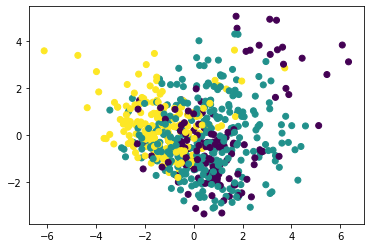

In [44]:
# Kmeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(pca_df)
prediction = kmeans.predict(pca_df)
pca_df['class'] = kmeans.labels_

# Plot the clusters
plt.scatter(x=pca_df[1], y=pca_df[2], c=pca_df['class'])
plt.show()


##### Make recommendation

##### Findings:
##### After applying dimensionality reduction using PCA and t-SNE, cluster analysis with Kmeans with 3 optimal clusters, we can see that t-SNE was not enough to see distinct clusters and also we can see overlapping cluster with Kmeans.
##### Recommendation:
##### The data needs to be tested and trained more inorder to get more accurate predictions and distinct clusters.
